**Module Path**

In [1]:
import os

os.chdir("./../../")

# Hill Climbing Method

In this notebook, we will implement Hill Climbing Method

---

## Explore CartPole

We begin by importing the necessary packages.

In [2]:
import numpy as np
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use("ggplot")
np.set_printoptions(precision=3, linewidth=120)

is_ipython = "inline" in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

from examples.cliffwalking.plot_utils import plot_values

In [3]:
from env import Gym
from policy import RandomPolicy

Use the code cell below to create an instance of the [CartPole](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py) environment.

In [4]:
env = Gym("cartpole")

Let's watch a random agent dealing with the environment

Score:  9.0


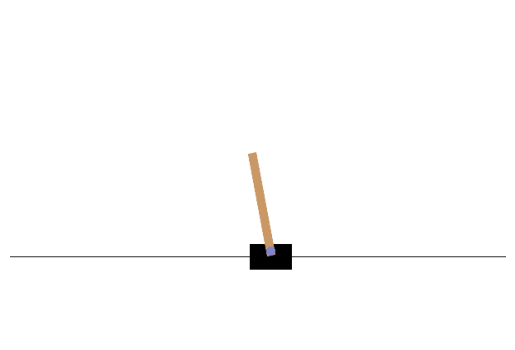

In [5]:
env.watch(RandomPolicy(env.get_action_space()), display)

In [6]:
print(env.get_observation_space())
print(env.get_action_space())

Box([-4.800e+00 -3.403e+38 -4.189e-01 -3.403e+38], [4.800e+00 3.403e+38 4.189e-01 3.403e+38], (4,), float32)
Discrete(2)


In [7]:
from policy import HillClimbingPolicy

action_size = env.get_action_space().n
state_size = len(env.get_observation_space().sample())

noise_scale=1e-2
min_noise_scale=1e-3
max_noise_scale=2

policy = HillClimbingPolicy(
    s_size = state_size,
    a_size = action_size,
    noise_scale=noise_scale,
    min_noise_scale=min_noise_scale,
    max_noise_scale=max_noise_scale
)

## Train

In [8]:
from train import TrainerHillClimbing

max_steps_per_episode=1000
gamma=0.99
print_every=100
target_score=195.0
n_episodes = 1_000

trainer = TrainerHillClimbing(
    policy,
    env,
    max_steps_per_episode=max_steps_per_episode,
    gamma=gamma,
    target_score=target_score
)
scores = trainer.train(n_episodes)

Environment solved in 48 episodes!	Average Score: 196.81


In [9]:
trainer.evaluate(500)

Evaluation: Average reward over 500 episodes: 945.88


945.882

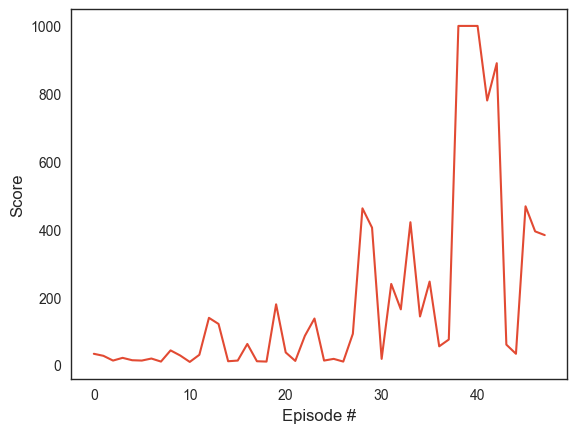

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.show()

## Watch a Smart Agent!

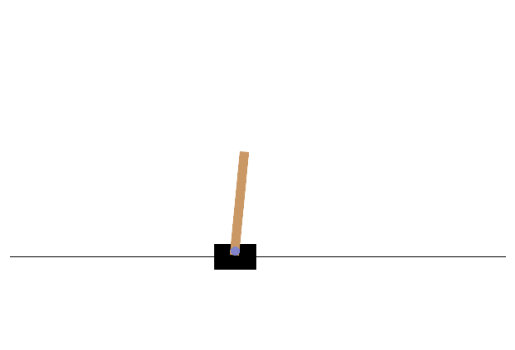

In [11]:
env.watch(policy, display)

The Agent could balance the pole on the cart for entire 1000 (default in `watch` method) steps